In [6]:
import pandas as pd

# Load dataset
df = pd.read_csv("ambient_light_dataset1.csv")

# Drop invalid values
df = df[(df['avg_pixel_brightness'] > 1) & (df['avg_pixel_brightness'] < 250)]

# Normalize theme_mode
df['theme_mode'] = df['theme_mode'].replace({
    "Light": 0, "Dark": 1, "Drk": 1, 4: 1
})

# Encode time_of_day
df['time_of_day'] = df['time_of_day'].replace({
    "Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3
})

print(df.head())


             timestamp  avg_pixel_brightness  time_of_day  screen_brightness  \
0  2025-08-21 17:22:25                    58            1                 20   
1  2025-08-21 17:24:03                    68            1                 25   
2  2025-08-21 17:25:52                    68            1                 25   
3  2025-08-21 17:26:59                   110            1                 55   
4  2025-08-21 17:40:43                   110            1                 45   

   theme_mode  
0           1  
1           1  
2           1  
3           1  
4           0  


C:\Users\bawantha\AppData\Local\Temp\ipykernel_7708\2628768521.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['theme_mode'] = df['theme_mode'].replace({
C:\Users\bawantha\AppData\Local\Temp\ipykernel_7708\2628768521.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['time_of_day'] = df['time_of_day'].replace({


In [7]:
print(df.tail())

               timestamp  avg_pixel_brightness  time_of_day  \
159  2025-08-22 12:51:35                   116            1   
160  2025-08-22 12:52:29                   126            1   
161  2025-08-22 12:52:54                   125            1   
162  2025-08-22 12:53:19                   126            1   
163  2025-08-22 12:53:57                   115            1   

     screen_brightness  theme_mode  
159                 50           0  
160                 55           0  
161                 50           0  
162                 55           0  
163                 50           0  


C:\Users\bawantha\AppData\Local\Temp\ipykernel_4256\1548446018.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["theme_mode"] = df["theme_mode"].astype(str).str.strip().replace({"Light": 0, "Dark": 1})



 Model Accuracy Summary:
                       MSE      R²
Linear Regression  17.9468  0.9685
Random Forest       2.6702  0.9953
Gradient Boosting   3.0605  0.9946


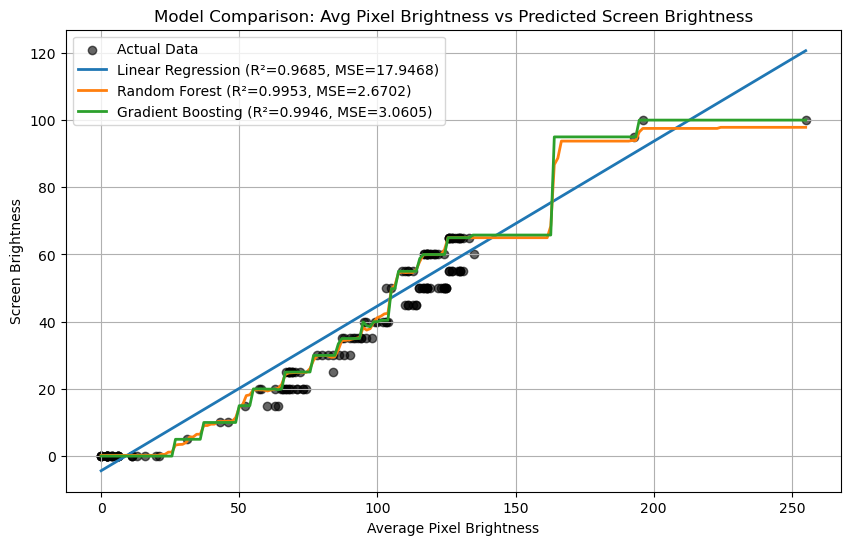

In [3]:
#  Accuracy Summary + Chart (3 Models)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ====== Load Dataset ======
df = pd.read_csv("ambient_light_dataset1.csv")

# Clean categorical values
df["theme_mode"] = df["theme_mode"].astype(str).str.strip().replace({"Light": 0, "Dark": 1})

# Map time_of_day
time_map = {"Morning": 0, "Afternoon": 1, "Evening": 2, "Night": 3}
df["time_of_day"] = df["time_of_day"].map(time_map)

# Features & target
X = df[["avg_pixel_brightness", "time_of_day", "theme_mode"]]
y = df["screen_brightness"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ====== Select Models ======
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
}

# ====== Train & Evaluate ======
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": round(mse, 4), "R²": round(r2, 4)}
    models[name] = model  # store trained model

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print("\n Model Accuracy Summary:")
print(results_df)

# ====== Chart: Avg Pixel Brightness vs Predicted ======
brightness_range = np.linspace(df["avg_pixel_brightness"].min(),
                               df["avg_pixel_brightness"].max(), 200)

median_time = int(df["time_of_day"].median())
median_theme = int(df["theme_mode"].median())

X_plot = pd.DataFrame({
    "avg_pixel_brightness": brightness_range,
    "time_of_day": [median_time] * len(brightness_range),
    "theme_mode": [median_theme] * len(brightness_range)
})

plt.figure(figsize=(10,6))

# Plot actual points
plt.scatter(df["avg_pixel_brightness"], df["screen_brightness"], alpha=0.6,
            label="Actual Data", color="black", edgecolors="k")

# Predictions for each model
for name, model in models.items():
    y_pred_line = model.predict(X_plot)
    plt.plot(brightness_range, y_pred_line, linewidth=2,
             label=f"{name} (R²={results[name]['R²']}, MSE={results[name]['MSE']})")

plt.xlabel("Average Pixel Brightness")
plt.ylabel("Screen Brightness")
plt.title("Model Comparison: Avg Pixel Brightness vs Predicted Screen Brightness")
plt.legend()
plt.grid(True)
plt.show()
